#  APPSS Data Reductions of Slice 35 

###### Chelsey McMichael

# Introduction

Slice Thirt-Five consists of ninety-eight different sources, each containing one to three wappfiles in each source to be reduced. Instructions on reducing the L-Band Wide data are available at http://egg.astro.cornell.edu/alfalfa/ugradteam/lbw/lbw_reduction_wapps.htm. However, some information may not be available from the instructions link. For instance, there may be an inssue in which the wappfiles under a specific source on the spreadsheet do not have the same source name. If this happens, lbwcoadd will not be allowed, and the individual wappfiles should be checked for their source names. Afterwards, report it to a supervisor and they shall provide the correct wappfile.  

# Repeating Signals

When seeing signals that seem to be repeating throughout unrelated wappfiles, it is best to determine whether or not this is a known signal based off of the magnitude of the frequency of this signal. Use http://www.naic.edu/%7Ephil/rfi/rfilist.html if there is a peculiar signal that is found in multiple wappfiles. For instance, in the first single wappfile of slice 35, there is a huge signal around 1388 MHz. The list of this page gives information such as the frequency range, the date of the signal, and a comment referring to the signal. The 1388 MHz signal is described as a beeper harmonic. There is also a signal seen multiple times in board 1 with a frequency of about 1417.5 MHz, the website states that this is rfi from color cameras in the dome.

# Analysis

Out of the ninety-eight sources, there are three hundred and ninety-two baselines measured and eighty-three detections. 

In [2]:
from astropy.io import ascii
import numpy as np

data=ascii.read("slice_35.csv")
detnon = data['d/n']
d=detnon[np.where(detnon == 'd')]
n=detnon[np.where(detnon == 'n')]
#np.where(detnon is d)
print'There are',np.size(d),'detections.'
print 'There are',np.size(n), 'non-detections.'

There are 83 detections.
There are 309 non-detections.


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


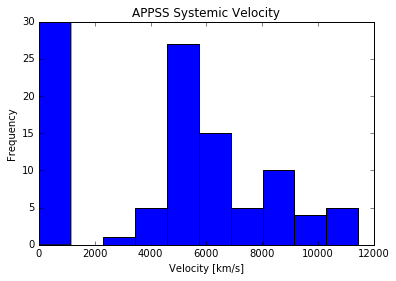

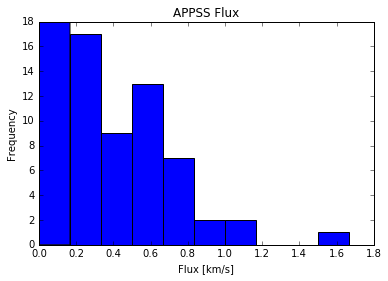

In [3]:
import pylab
data=ascii.read("slice_35.csv")



vel=data['Vsys']
fx=data['Flux']

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

gaussian_numbers = vel
plt.figure(1)
plt.hist(gaussian_numbers)
plt.title("APPSS Systemic Velocity")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")

pylab.ylim([0,30]) 

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('velocity_APPSS.pdf')

gaussian_numbers = fx
plt.figure(2)
plt.hist(gaussian_numbers)
plt.title("APPSS Flux")
plt.xlabel("Flux [km/s]")
plt.ylabel("Frequency")
#pylab.xlim([0, 17600])
pylab.ylim([0,18]) 

fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('flux_appss.pdf')


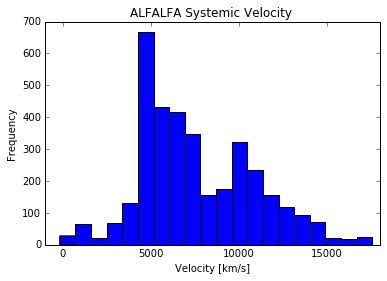

In [4]:
from astropy.io import ascii
import pylab

data=ascii.read("alf_data.csv")

v=data['Vhelio']


plt.figure()
plt.hist(v,bins=20)
pylab.xlim([-1000,18000])

plt.title("ALFALFA Systemic Velocity ")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig('velocity_ALF.pdf')

In [5]:
data=ascii.read("slice_35.csv")
s_n = data['SN']
goodsn=s_n[np.where(s_n > 2.)]
np.size(goodsn)
#where is the signal to noise ratio greater than 2?

62

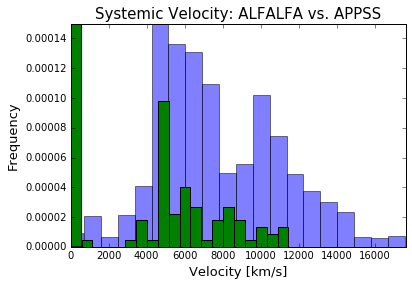

In [6]:
import pylab
from astropy.io import ascii
data1=ascii.read("slice_35.csv")
data2=ascii.read("alf_data.csv")

v1=data1['Vsys']
v2=data2['Vhelio']

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

plt.figure(1)
plt.hist(v2,bins=20, alpha=.5, normed = True)
plt.hist(v1,bins=20, normed=True)

plt.title("Systemic Velocity: ALFALFA vs. APPSS", fontsize=15)
plt.xlabel("Velocity [km/s]",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
pylab.xlim([0, 17600])
pylab.ylim([0,.00015]) 

fig = plt.gcf()
plt.show()


plt.draw()

fig.savefig('velocity_both_hist.pdf')

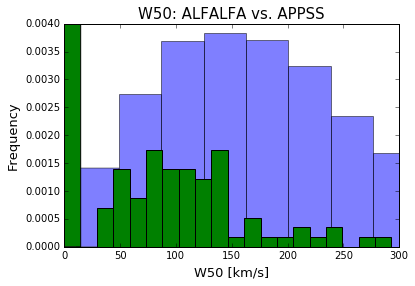

In [7]:
data1=ascii.read("slice_35.csv")
data2=ascii.read("alf_data.csv")

w50_me=data1['W50']
w50_alfalfa=data2['W50']

plt.figure()

plt.hist(w50_alfalfa, bins=20, alpha =.5, normed = True)
plt.hist(w50_me, bins=20, normed = True)
plt.title("W50: ALFALFA vs. APPSS",fontsize= 15)
plt.xlabel("W50 [km/s]", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
pylab.ylim([0,.004]) 
pylab.xlim([0,300])

fig = plt.gcf()
plt.show()


plt.draw()

fig.savefig('w50_both_hist.pdf')



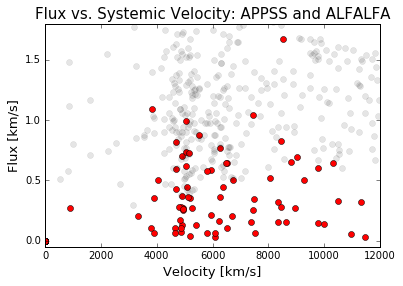

In [8]:
import pylab


data1=ascii.read("slice_35.csv")
data2=ascii.read("alf_data.csv")


HI = data2['usedecdeg']
gooddec=(HI >= 33.5) & (HI <= 36.5)
#print(goodHI)

#my data
flux_me=data1['Flux']
v1=data1['Vsys']

#alfalfa data
flux_alf=data2['HIflux']
v2=data2['Vhelio']

goodv2=v2[gooddec]
goodflux=flux_alf[gooddec]

plt.figure()
plt.plot(v1, flux_me,'ro')
plt.plot(goodv2, goodflux,'ko', alpha=.1) #only near dec 35, 1.5
plt.title('Flux vs. Systemic Velocity: APPSS and ALFALFA',fontsize=15)
plt.xlabel('Velocity [km/s]',fontsize=13)
plt.ylabel('Flux [km/s]',fontsize=13)
pylab.ylim([-.05,1.8]) 
pylab.xlim([0,12000])
fig = plt.gcf()
plt.show()


plt.draw()

fig.savefig('flux_velocity_both.pdf')


In [10]:
data1=ascii.read("slice_35_new.csv")#this has the addition of 2 columns which are just made up of the srcname column
data2=ascii.read("alf_data.csv")

from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import pandas # this function may not be installed on other computers, make a version where you do not have to split the column

AGC=data1[0][:]
str_ra=data1[3][:] #RA column
str_dec=data1[4][:] #DEC column
ra_hrdeg = list(str_ra)
ra_mindeg = list(str_ra)
ra_secdeg = list(str_ra)

dec_degdeg = list(str_dec)
dec_mindeg = list(str_dec)
dec_secdeg = list(str_dec)

for i in range(len(ra_hrdeg)):
    
    ra_hrdeg[i] = float(ra_hrdeg[i][1:3])*15.
    ra_mindeg[i] = float(ra_mindeg[i][3:5])*15./60.
    ra_secdeg[i] = float(ra_secdeg[i][5:])*15./3600.
    #do same for dec. 
    dec_degdeg[i] = str(dec_degdeg[i])#convert to a string since it begins with number
    dec_degdeg[i] = float(dec_degdeg[i][0:2])#take section you need
    dec_mindeg[i] = str(dec_mindeg[i])#convert it back to a number 
    dec_mindeg[i] = float(dec_mindeg[i][2:4])/60. 
    dec_secdeg[i] = str(dec_secdeg[i])
    dec_secdeg[i] = float(dec_secdeg[i][4:])/3600.
    
     
ra_deg=np.add(np.add(ra_hrdeg,ra_mindeg),ra_secdeg)
dec_deg=np.add(np.add(dec_degdeg, dec_mindeg), dec_secdeg)


for i in range(len(ra_deg)): #keep it in this range where the RA is positive and negative
    if ra_deg[i] > 180.:
        ra_deg[i] = ra_deg[i]-360.   
        
num=13




print(AGC[num], ra_deg[num], dec_deg[num])
#print(dec_deg)

(322526, -21.739166666666677, 35.385833333333331)


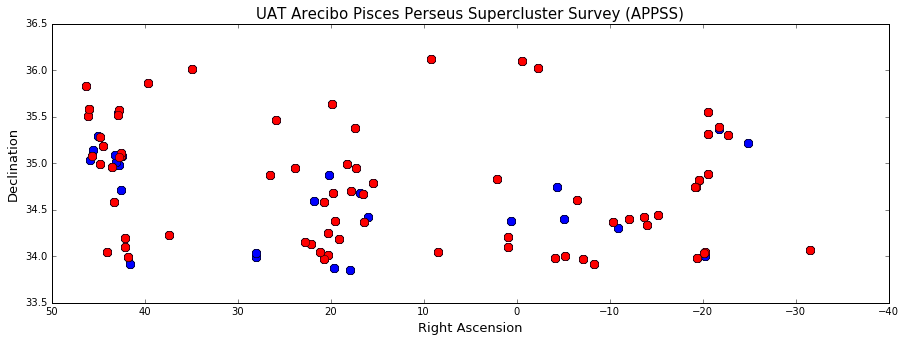

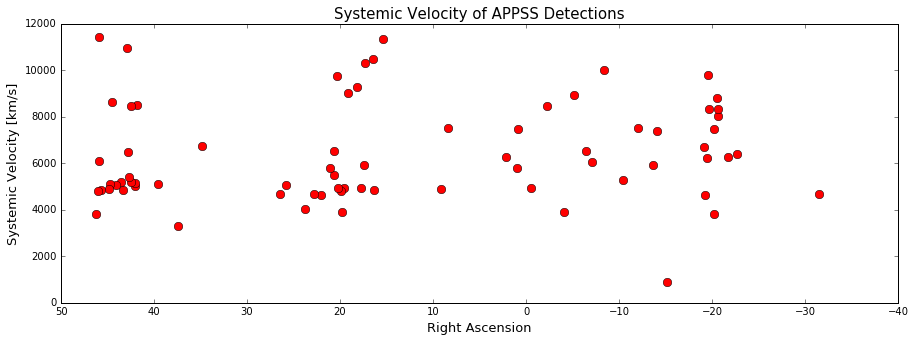

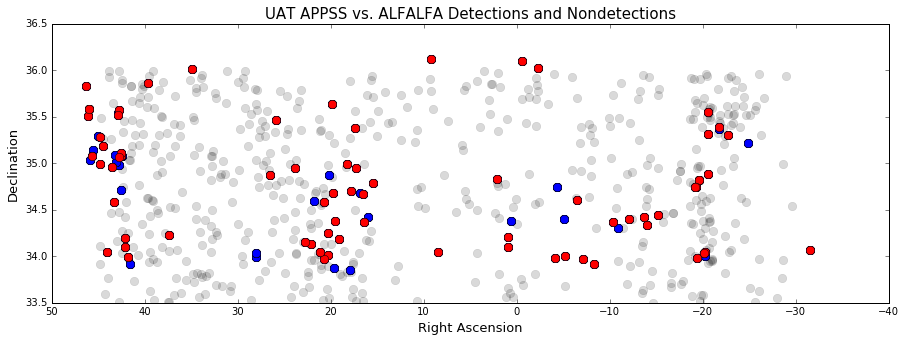

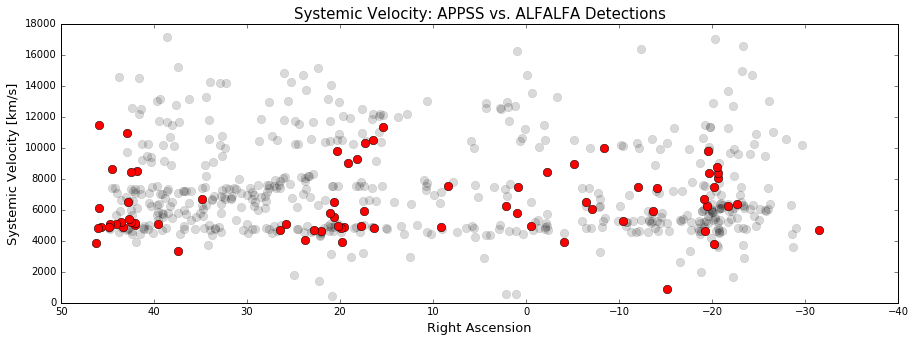

In [12]:
v_sys=data1['Vsys'] #insert the systemic velocity 

#These 'good' values are defined as having systemic velocities greater than 0 km/s
good_v_sys= v_sys[(v_sys > 0)]
good_ra= ra_deg[(v_sys > 0)]
good_dec= dec_deg[(v_sys > 0)]
nd_v_sys= v_sys[(v_sys == 0)]
nd_ra_deg= ra_deg[(v_sys == 0)]

plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(ra_deg,dec_deg,'bo', markersize=8.5) #blue circles consist of nondetections
plt.plot(good_ra,good_dec,'ro',markersize=8.5) #red circles define detection
plt.title("UAT Arecibo Pisces Perseus Supercluster Survey (APPSS)", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Declination", fontsize=13)

fig1 = plt.gcf()
plt.show()
plt.draw()

fig1.savefig('just_arecibo.pdf')

plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5) #these are all detections and their calculated systemic velocity
plt.title("Systemic Velocity of APPSS Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)

fig2 = plt.gcf()
fig2.savefig('RA_vs_Vsys.pdf')

RA_alf=data2["wrapradeg"]
Dec_alf=data2["usedecdeg"]

good_dec_alf= Dec_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)]
good_ra_alf = RA_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)]

plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra_alf, good_dec_alf, 'ko',markersize = 8.5, alpha =.15)
plt.plot(ra_deg,dec_deg,'bo', markersize=8.5) #blue circles consist of nondetections
plt.plot(good_ra,good_dec,'ro', markersize = 8.5) #red circles define detection
plt.title("UAT APPSS vs. ALFALFA Detections and Nondetections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Declination", fontsize=13)

fig3 = plt.gcf()

fig3.savefig('APPSS_ALFALFA.pdf')

v_alf = data2['Vhelio']

good_v_alf = v_alf[(good_dec_alf >= 33.5 )]

plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra_alf,good_v_alf,'ko', alpha=.15, markersize= 8.5 ) #these are all detections and their calculated systemic velocity
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5)
plt.title("Systemic Velocity: APPSS vs. ALFALFA Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)


fig4 = plt.gcf()  

fig4.savefig('APPSS_ALFALFA_vsys.pdf')